# Hotel reservation cancellation prediction

## 1 Introduction

### 1.1 Goal
The main goal of this project is to predict whether the customers will cancel their reservations.
Predicting cancellation enables accommodation businesses to plan to minimize empty rooms, which will help maximum profit. This work will provide insights to travel agencies on their businesses.

### 1.2 Install and load libraries
Installed and imported library packages needed.

In [128]:
pip install tableone

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [129]:
# Common
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import numpy.random as rand
from tableone import TableOne, load_dataset
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 1.3 Load the data

In [130]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
path = '/content/drive/MyDrive/Data Science Project/hotel_bookings.csv'
df= pd.read_csv(path)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 2 Explanatory data analysis

### 2.1 Data Overview
 The data had 32 variables (20 categorical, 12 numerical) and 119,390 observations. A brief sketch of the data is as below.

In [132]:
df.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(119390, 32)

In [133]:
df.info()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [134]:
df.iloc[:,0:11].head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0


In [135]:
df.iloc[:,11:22].head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes
0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3
1,0,BB,PRT,Direct,Direct,0,0,0,C,C,4
2,0,BB,GBR,Direct,Direct,0,0,0,A,C,0
3,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0
4,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0


In [136]:
df.iloc[:,22:33].head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### 2.2 Handling missing values
In dealing with Null values,  4 columns (`Children`, `country`, `agent`, `company`) in the data frame had Null values.
To comply with the structure and logic of the data, 
Null values in each column were replaced as 'children' : 0, 'country' : 'unknown', 'agent' : 0, and 'company' : 0.
Some observations have 0 adults, 0 children, and 0 kids. It does not make sense that a reservation has no guests, so those observations were dropped.

In [137]:
# Total null value counts
df.isnull().sum()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

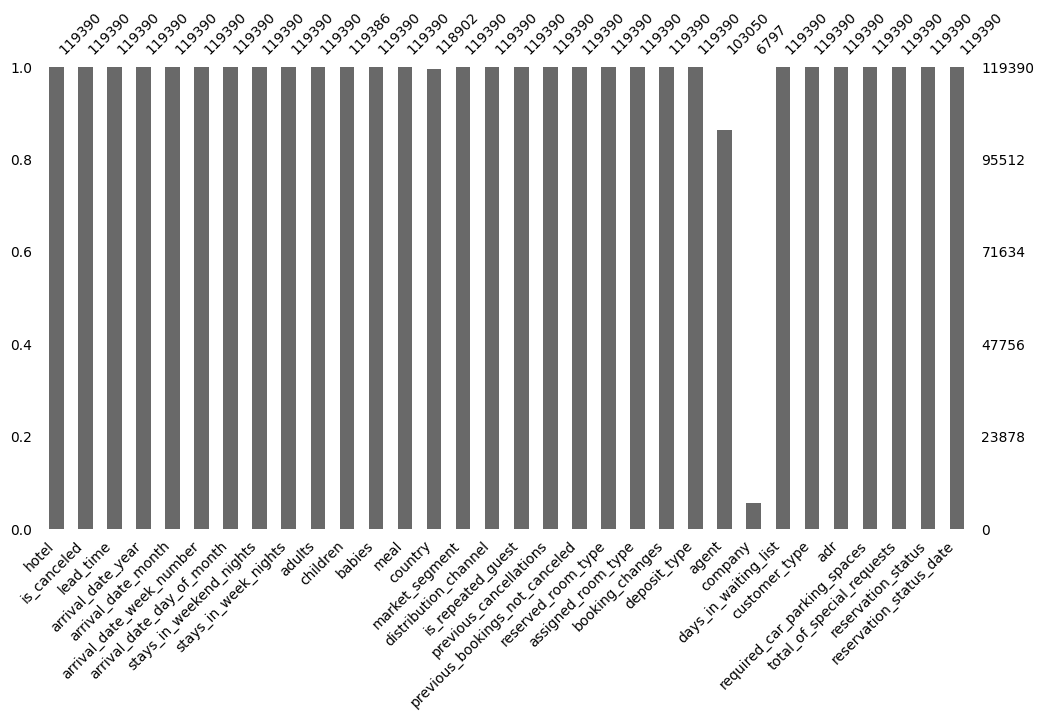

In [138]:
# Non null value proportion 12*6
msno.bar(df, figsize=(12,6), fontsize=10)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

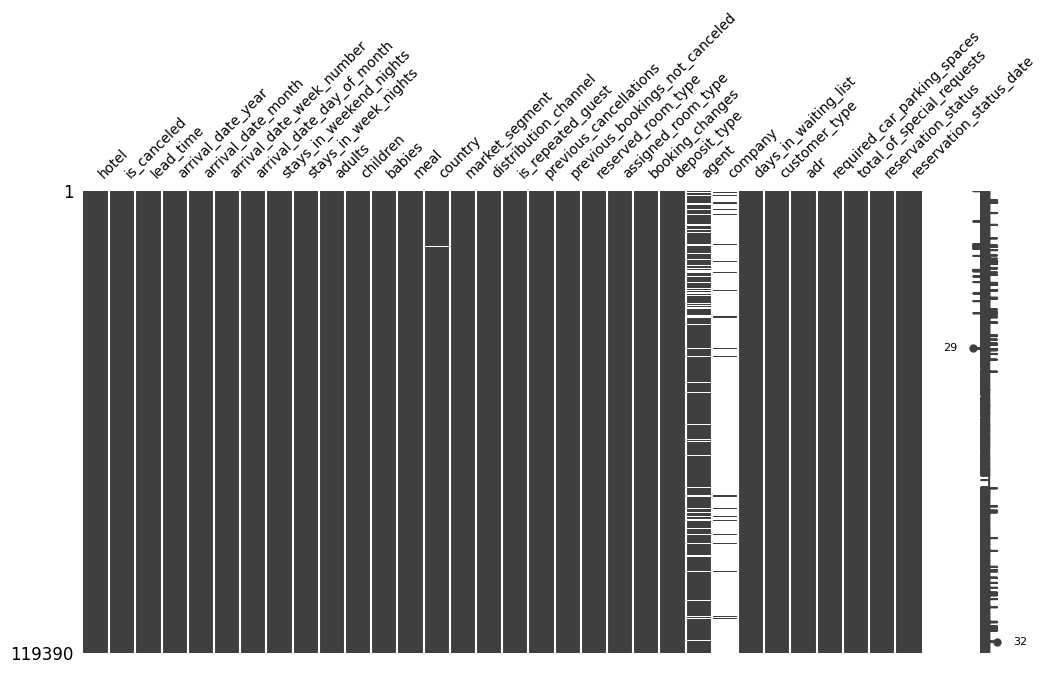

In [139]:
# Location of Null values
msno.matrix(df, figsize=(12,6), fontsize=10)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

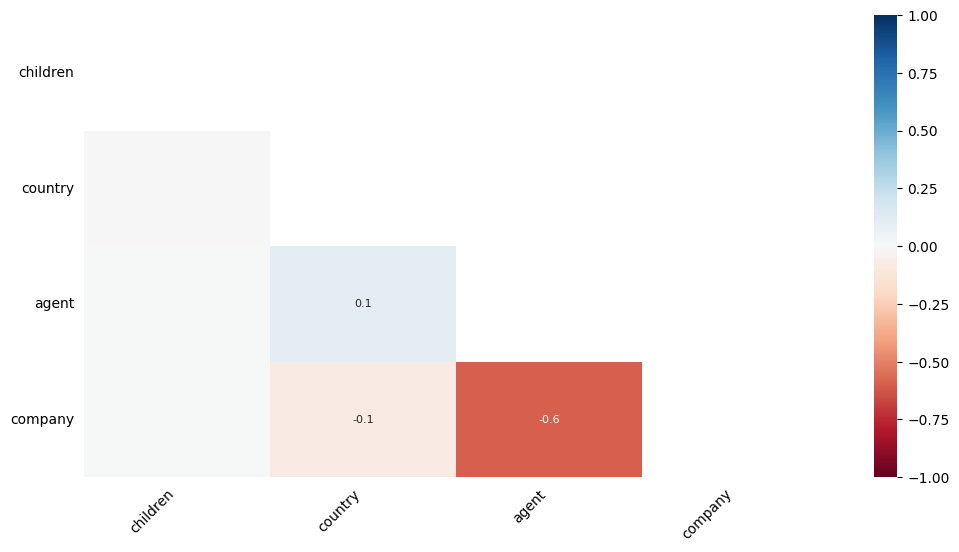

In [140]:
# Correlation of Null values
msno.heatmap(df, figsize=(12,6), fontsize=10)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

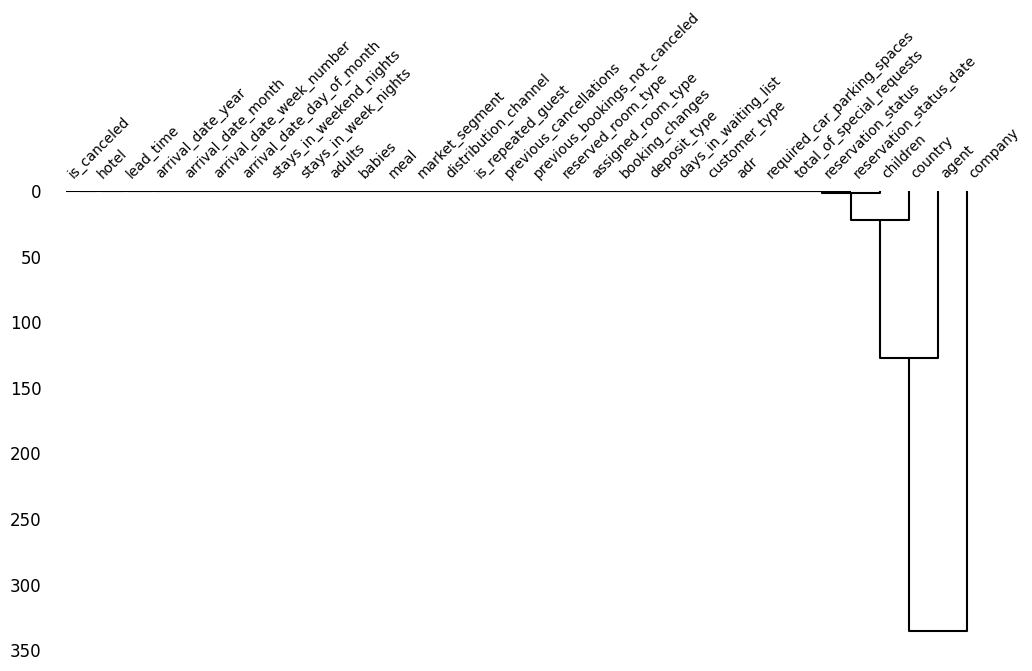

In [141]:
# Dendrogram of Null values
msno.dendrogram(df, figsize=(12,6), fontsize=10)

In [142]:
# Columns having Null values
df[df.columns[df.isna().any()]]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,children,country,agent,company
0,0.0,PRT,NaN,NaN
1,0.0,PRT,NaN,NaN
2,0.0,GBR,NaN,NaN
3,0.0,GBR,304.0,NaN
4,0.0,GBR,240.0,NaN
...,...,...,...,...
119385,0.0,BEL,394.0,NaN
119386,0.0,FRA,9.0,NaN
119387,0.0,DEU,9.0,NaN
119388,0.0,GBR,89.0,NaN


In [143]:
# Replacing Null values
nan_replacements = {'children':0, 'country':'unknown', 'agent':0, 'company':0}
df_cl=df.fillna(nan_replacements)
df_cl.isnull().sum()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [144]:
# Defining as 'none' the reservations that have 0 'adults', 0 'children', 0 'babies'
none= df_cl[df_cl['adults']+df_cl['children']+df_cl['babies']==0]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [145]:
none

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [146]:
# Defining the index of 'none'
none_index = none.index
# Defining a new dataframe dropping 'none' rows: reservations not having any customer
df_new= df_cl.drop(none_index)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 2.3 Visualization
To understand the data structure, visualize data by putting the `is canceled` variable on the y-axis and other variables on the x-axis. Depending on the data structure (numeric or categorical), draw a line plot, scatter plot, or bar plot.
In the visualization process, obvious outliers were removed, and the columns including future information such as `reservation_status` and `assigned_room_type` were dropped. Not all visualizations were included in this notebook, but all variables were visualized and checked during the project.

In [147]:
# Start with the total columns by 'hotel' type
df['hotel'].value_counts()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [148]:
# Average cancelltion by 'hotel' type
df_new.groupby('hotel')['is_canceled'].mean()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


hotel
City Hotel      0.417859
Resort Hotel    0.277674
Name: is_canceled, dtype: float64

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='lead_time', ylabel='is_canceled'>

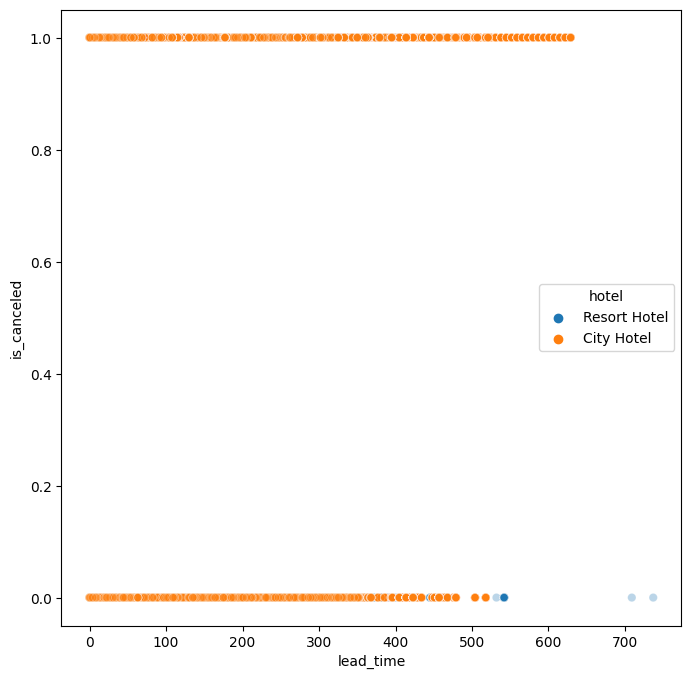

In [149]:
# Scatter plot of 'is_canceled' vs 'lead_time' 
plt.figure(figsize=(8,8))
sns.scatterplot( x='lead_time', y = 'is_canceled',data=df_new, hue= 'hotel', alpha=0.3)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='arrival_date_year', ylabel='is_canceled'>

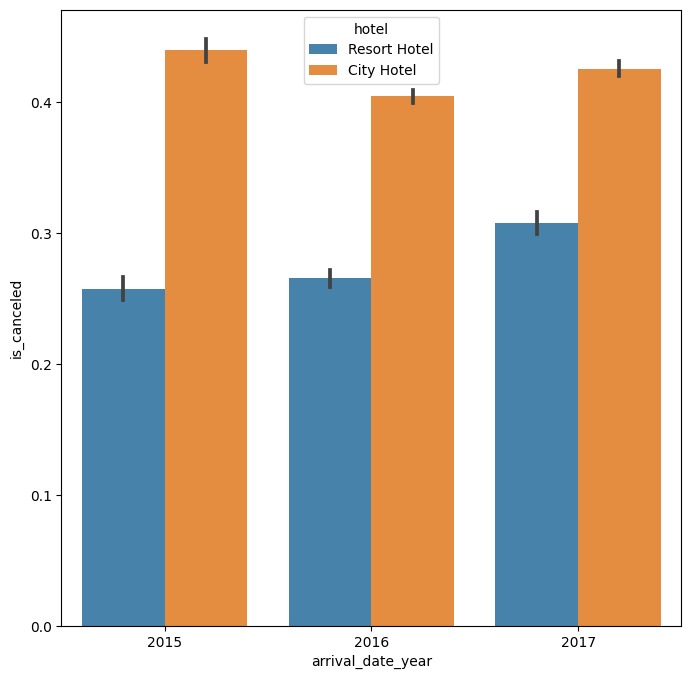

In [150]:
# Scatter plot of 'is_canceled' vs 'arrival_date_year' by 'hotel' type 
plt.figure(figsize=(8,8))
sns.barplot(x='arrival_date_year', y = 'is_canceled',data=df_new, hue='hotel', alpha=0.9)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='arrival_date_week_number', ylabel='is_canceled'>

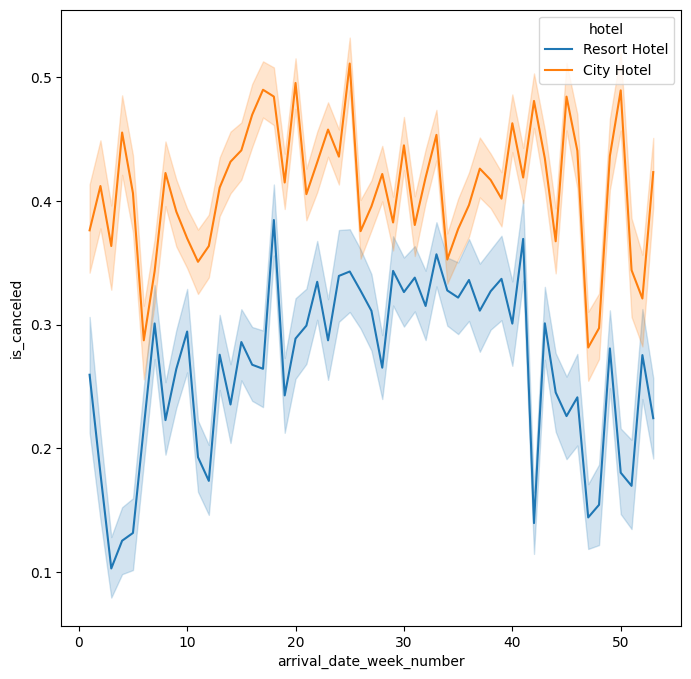

In [151]:
# Scatter plot of 'is_canceled' vs 'arrival_date_week_number' by 'hotel' type 
plt.figure(figsize=(8,8))
sns.lineplot(x='arrival_date_week_number', y = 'is_canceled',data=df_new, hue='hotel')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'July'),
  Text(1, 0, 'August'),
  Text(2, 0, 'September'),
  Text(3, 0, 'October'),
  Text(4, 0, 'November'),
  Text(5, 0, 'December'),
  Text(6, 0, 'January'),
  Text(7, 0, 'February'),
  Text(8, 0, 'March'),
  Text(9, 0, 'April'),
  Text(10, 0, 'May'),
  Text(11, 0, 'June')])

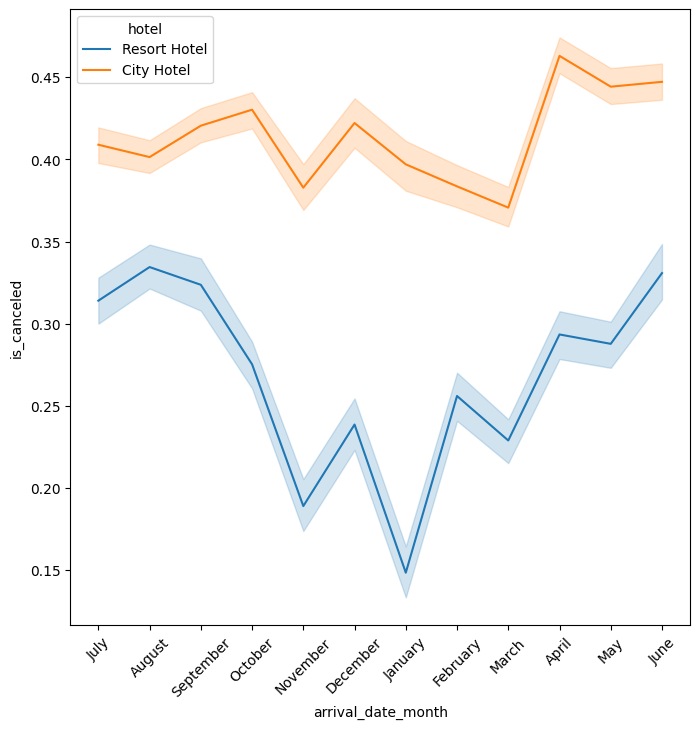

In [152]:
# Scatter plot of 'is_canceled' vs 'arrival_date_month' by 'hotel' type 
plt.figure(figsize=(8,8))
sns.lineplot(x='arrival_date_month', y = 'is_canceled',data=df_new, hue='hotel')
plt.xticks(rotation =45)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='arrival_date_day_of_month', ylabel='is_canceled'>

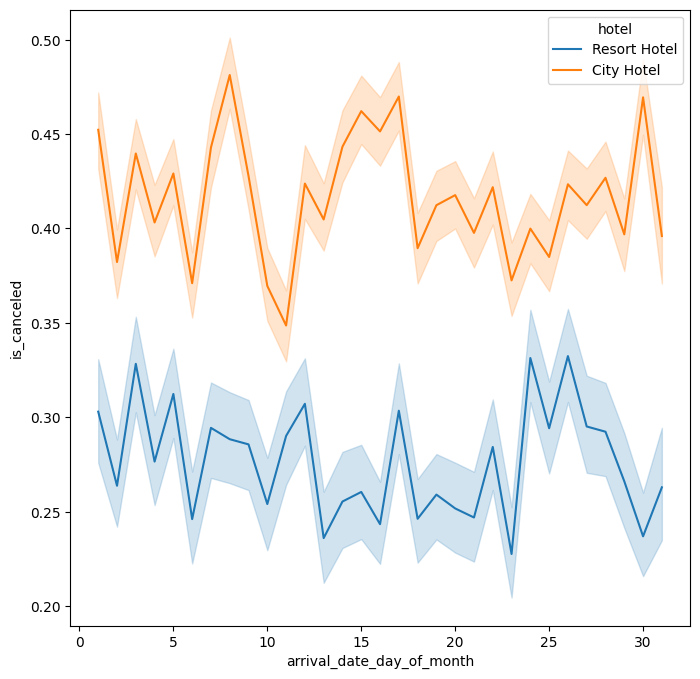

In [153]:
# Scatter plot of 'is_canceled' vs 'arrival_date_day_of_month' by 'hotel' type 
plt.figure(figsize=(8,8))
sns.lineplot(x='arrival_date_day_of_month', y = 'is_canceled',data=df_new, hue='hotel')

In [154]:
# Removing the outliers that have more than 5 'adults'
adult_over_5 = df_new[df_new['adults']>=5].index
df_new.drop(adult_over_5 , inplace=True)
df_new[df_new['adults']>=5]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='adults', ylabel='is_canceled'>

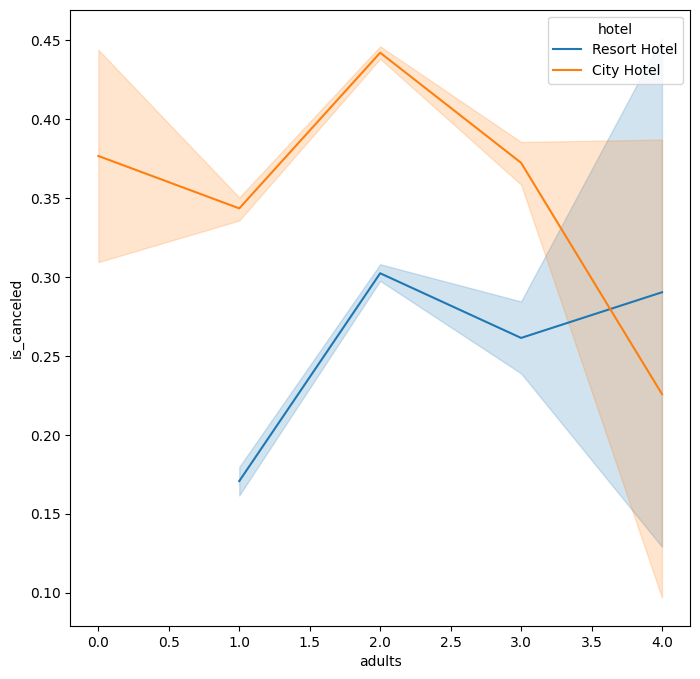

In [155]:
# Outlier(adults > 5) removed Scatter plot of'is_canceled' vs 'adults' by 'hotel' type
plt.figure(figsize=(8,8))
sns.lineplot(x='adults', y = 'is_canceled',data=df_new, hue='hotel')

In [156]:
# Dropping rows that have 'children' > 3
child_over_3=df_new[df_new['children']>3].index
df_new.drop(child_over_3,inplace=True)
df_new[df_new['children']>3]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='children', ylabel='is_canceled'>

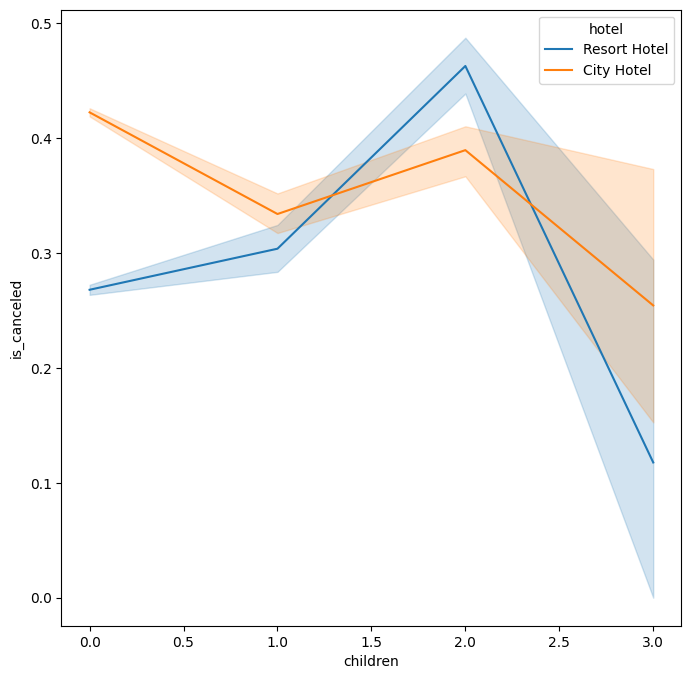

In [157]:
# Outlier('Children' > 3) removed scatter plot of 'is_canceled' vs 'children' by 'hotel' type 
plt.figure(figsize=(8,8))
sns.lineplot(x='children', y = 'is_canceled',data=df_new, hue='hotel')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='total_of_special_requests', ylabel='is_canceled'>

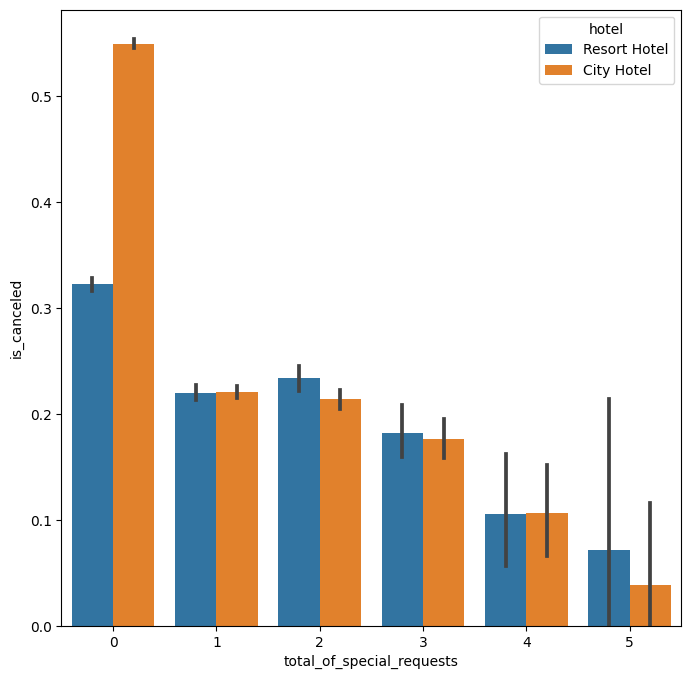

In [158]:
plt.figure(figsize=(8,8))
sns.barplot(x='total_of_special_requests', y = 'is_canceled',data=df_new, hue='hotel')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='reservation_status', ylabel='is_canceled'>

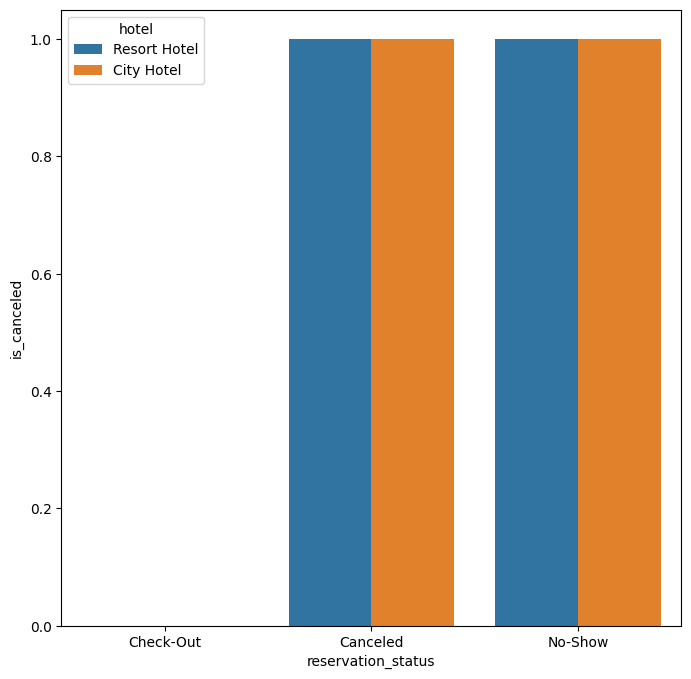

In [159]:
plt.figure(figsize=(8,8))
sns.barplot(x='reservation_status', y = 'is_canceled',data=df_new, hue='hotel')

In [160]:
length= df_new.groupby('country')['is_canceled'].count().sort_values(ascending = False).head(10)
length
total= pd.DataFrame(length)
total
cancel_by_country = df_new.groupby('country')['is_canceled'].sum()
cancel=pd.DataFrame(cancel_by_country)
total.rename(columns={'is_canceled':'total'},inplace=True)
country = total.join(cancel, on='country')
country.rename(columns={'is_canceled':'cancel'},inplace=True)
country['cancel_rate']=country['cancel']/country['total']
cancel_rate=country.reset_index()
cancel_rate

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,country,total,cancel,cancel_rate
0,PRT,48466,27489,0.567181
1,GBR,12120,2452,0.202310
2,FRA,10401,1933,0.185848
3,ESP,8560,2177,0.254322
4,DEU,7285,1218,0.167193
5,ITA,3761,1333,0.354427
6,IRL,3374,832,0.246592
7,BEL,2342,474,0.202391
8,BRA,2222,830,0.373537
9,NLD,2103,387,0.184023


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='country', ylabel='cancel_rate'>

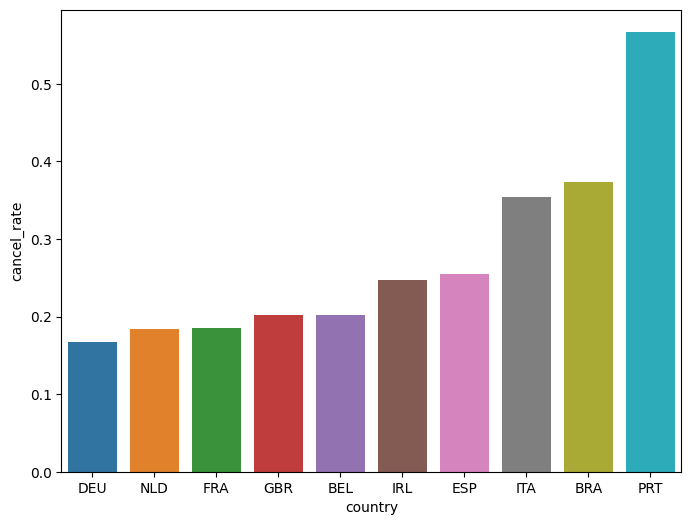

In [161]:
# Bargraph of 'cancel_rate' and 'country' 
plt.figure(figsize=(8,6))
sns.barplot(y='cancel_rate',x='country',data=cancel_rate, order=cancel_rate.sort_values('cancel_rate').country)

In [162]:
cancel = cancel.copy
cancel

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<bound method NDFrame.copy of          is_canceled
country             
ABW                0
AGO              205
AIA                0
ALB                2
AND                5
...              ...
VNM                2
ZAF               31
ZMB                1
ZWE                2
unknown           57

[178 rows x 1 columns]>

## 3 Preprocess
Based on the visualized data analysis, preprocess the data in the form that can be used in model building. Conducted table one test and dropped columns that have p-value greater than 0.05. To boost the model's accuracy, minor values of variables were combined as 'others,' and only some of the processes are included in the notebook. Still, value counts and visualizations were conducted for all variables before combining data. Numerical variables that will be included in the model were normalized as much as possible.


In [163]:
# Dropping insignificant columns 'reservation_status_date'
df2 = df_new.drop(columns=['reservation_status_date','stays_in_weekend_nights','children'])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [164]:
# Manually selecting categorical vairalbes
columns2 = [df2.columns]
categorical2=['hotel', 'is_canceled', 
       'arrival_date_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest','reserved_room_type',
       'assigned_room_type', 'deposit_type', 'agent',
       'company', 'customer_type']

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [169]:
# Combining 'company' and 'agent' as 'Integrated_agent'
df2['Integrated_agent']= df2['company']+df2['agent']

# Assigning '999' to the largest 'Integrated_agent' and define it as 'new_agent' to distinguish
df2['new_agent'] = df2['Integrated_agent'].replace(9,999)

# Assigning '998' to second largest 'new_agent' to distinguish
df2['new_agent'].replace(240,998, inplace=True)

# Assigning '0' to other 'new_agent' other than '999', '998'
df2['new_agent'][df2['new_agent']<998]=0

# Dropping old columns('company', 'agent', 'Integrated_agent') reflected in 'new_agent' 
df2.drop(columns=['company','agent','Integrated_agent','assigned_room_type'],inplace=True)

# Assign 'new_agent' as a categorical variable
df2['new_agent'] = df2['new_agent'].astype(object)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [171]:
# Renaming the values of 'reservation_status'
df2['reservation_status'].replace({'Check-Out':'paid', 'Canceled':'not-paid','No-Show':'paid'},inplace= True)

# Renaming the column 'reservation_status' as 'paid'
df2.rename(columns={'reservation_status':'paid'}, inplace=True)

# Categorizing the values of 'market_segment' as 'Direct' and 'Corporate'
df2['market_segment'].replace({'Undefined':'Direct','Aviation':'Corporate','Complementary':'Direct'}, inplace=True)

# Combining 'meal' into three values
df2['meal'].replace({'SC':'No_meal','Undefined':'No_meal','FB':'HB'},inplace=True)

# Combining the values of 'reserved_room_type'
df2['reserved_room_type']= df2['reserved_room_type'].replace({'E':'Others','F':'Others','G':'Others','C':'Others','B':'Others','H':'Others','I':'Others','K':'Others','L':'Others'})

# Categorizing 'booking_changes' into '0','1', 'others'
df2['booking_changes'][df['booking_changes']>1]=99

# Converting 'booking_changes' into a categorical variable
df2['booking_changes'] = df2['booking_changes'].astype(object)

# Combining 'Refundable' as 'No deposit' 
df2['deposit_type'].replace({'Refundable':'No Deposit'}, inplace = True)

# Renaming the value in 'deposit_type'
df2['deposit_type'].replace({'No Deposit':'Refundable& No Deposit'}, inplace = True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='deposit_type', ylabel='is_canceled'>

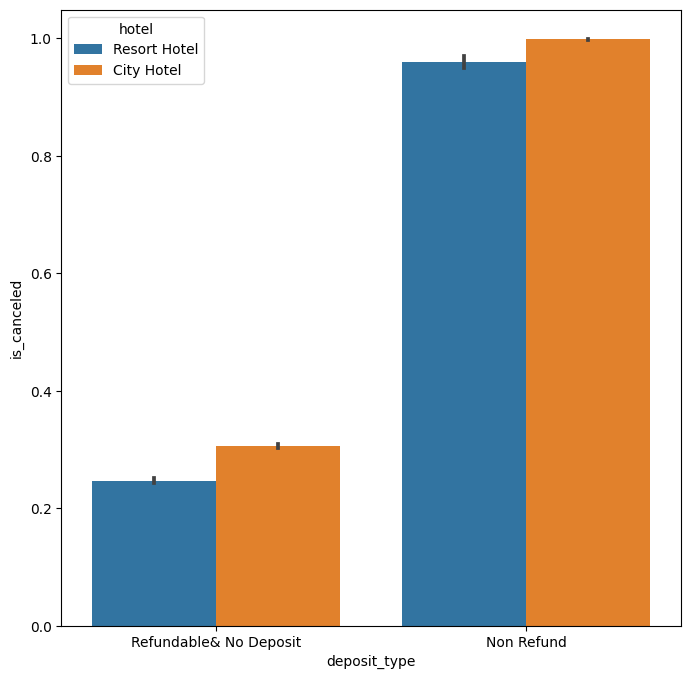

In [180]:
# Bar plot of 'is_canceled' and 'deposit_type' after the combination
plt.figure(figsize=(8,8))
sns.barplot(x='deposit_type', y = 'is_canceled',data=df2, hue='hotel')

In [181]:
# Deposit_type only contains the data before check in. Checked in guests data is not included so it is biased and dropped.
df2.drop(columns='deposit_type', inplace=True)

# Combining values > 1 in 'days_in_waiting_list'
df2['days_in_waiting_list'][df['days_in_waiting_list']>1]=1

# Integrating the minor values in 'customer_type'
df2['customer_type'].replace({'Transient-Party':'other','Contract':'other','Group':'other'},inplace=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

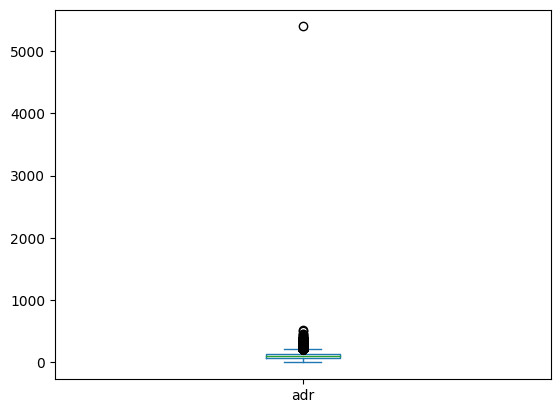

In [184]:
# Boxplot of 'adr' which stands for average daily rate
df2.adr.plot(kind='box')

In [185]:
# Removing a outlier in 'adr'
df2['adr'].replace(5400,0, inplace=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

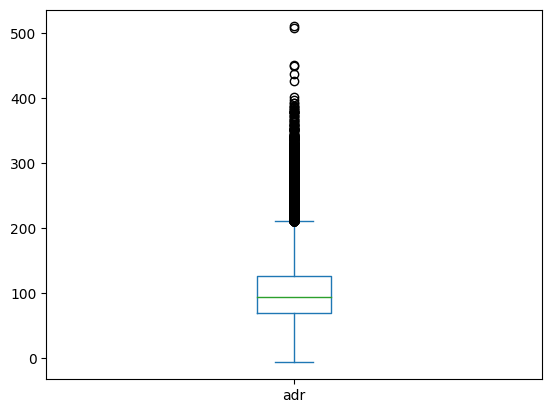

In [186]:
# Boxplot of 'adr' after removing the outlier
df2.adr.plot(kind='box')

In [187]:
# Checking whether there exists 'adr' = 0, which means customers did not pay for the stay
df2[df2['adr']==0]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,adults,babies,...,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,paid,new_agent
0,Resort Hotel,0,342,2015,July,27,1,0,2,0,...,0,Others,99,0,Transient,0.0,0,0,paid,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,2,0,...,0,Others,99,0,Transient,0.0,0,0,paid,0.0
125,Resort Hotel,0,32,2015,July,27,4,1,4,0,...,0,Others,99,0,Transient,0.0,0,1,paid,0.0
167,Resort Hotel,0,111,2015,July,28,6,0,2,0,...,0,A,0,0,Transient,0.0,0,2,paid,998.0
168,Resort Hotel,0,0,2015,July,28,6,0,1,0,...,0,Others,0,0,Transient,0.0,0,0,paid,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118631,City Hotel,0,78,2017,August,34,23,0,1,0,...,0,A,99,0,other,0.0,0,0,paid,0.0
118762,City Hotel,0,1,2017,August,34,24,1,2,0,...,0,A,1,0,Transient,0.0,0,3,paid,0.0
118963,City Hotel,0,1,2017,August,35,27,0,2,0,...,0,A,0,0,Transient,0.0,0,0,paid,0.0
119102,City Hotel,0,518,2017,August,34,26,1,1,0,...,0,A,1,0,other,0.0,0,0,paid,0.0


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='adr', ylabel='Count'>

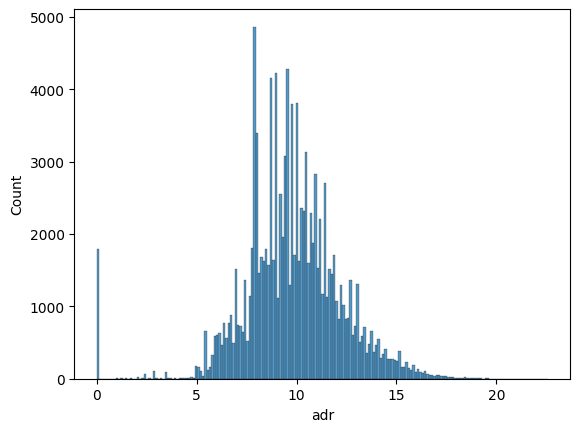

In [189]:
# Normalizing 'adr'
bb= np.sqrt(df2['adr'])

# Normalized histogram of 'adr'
sns.histplot(bb)

In [190]:
# Value counts of 'required_car_parking_spaces'
df2['required_car_parking_spaces'].value_counts()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    111784
1      7376
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

In [192]:
# Combing the values of 'required_car_parking_spaces' greater than 0 to 1
df2['required_car_parking_spaces'][df['required_car_parking_spaces']>0]=1

# Value counts of integrated 'required_car_parking_spaces'
df2['required_car_parking_spaces'].value_counts()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    111784
1      7409
Name: required_car_parking_spaces, dtype: int64

In [193]:
# Convert the type of 'required_car_parking_spaces'
df2['required_car_parking_spaces'] = df2['required_car_parking_spaces'].astype(object)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [195]:
# Renaming the value 1 as '1 or more' in 'required_car_parking_spaces'
df2['required_car_parking_spaces'].replace('1','1 or more', inplace=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [196]:
# Integrating the values > 2 as 2 in 'total_of_special_requests'
df2['total_of_special_requests'][df2['total_of_special_requests']>2]=2

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-196-5d6e0da4dbc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_of_special_requests'][df2['total_of_special_requests']>2]=2


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='total_of_special_requests', ylabel='is_canceled'>

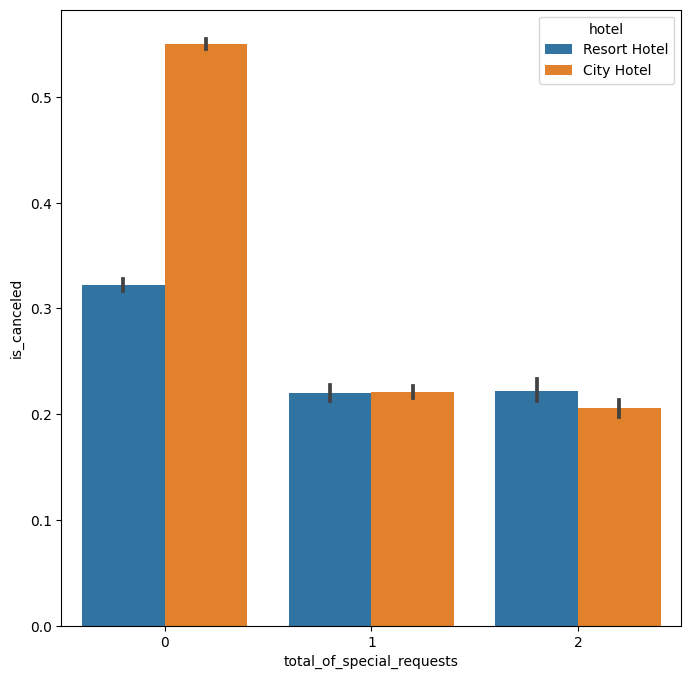

In [197]:
# Barplot after the integration
plt.figure(figsize=(8,8))
sns.barplot(x='total_of_special_requests', y = 'is_canceled',data=df2, hue='hotel')

In [199]:
# Integrating the values of 'stays_in_week_nights' > 5 as 99
df2['stays_in_week_nights'][df2['stays_in_week_nights']>5]=99

# Value counts of 'stays_in_week_nights'
df2['stays_in_week_nights'].value_counts(normalize=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2     0.282475
1     0.254142
3     0.186571
5     0.092766
4     0.080063
0     0.063519
99    0.040464
Name: stays_in_week_nights, dtype: float64

In [200]:
# Integrating the values of 'stays_in_week_nights' > 5 as 6
df2['stays_in_week_nights'].replace(99,6, inplace= True)

# Integrating the values of
df2['babies'][df2['babies']>1]=1

# Integrating 'PRT' of 'country' as 'others'
df2['country'][df2['country']!='PRT']='others'

# Integrating the values of 'distribution_channel'
df2['distribution_channel'].replace({'Direct':'others','Corporate':'others','GDS':'others','Undefined':'others'},inplace=True)

# Integrating the value of 'previous_cancellations' > 0 as 1
df2['previous_cancellations'][df2['previous_cancellations']>0]=1

# Integrating the value of 'previous_booking_not_canceled' > 0 as 1
df2['previous_bookings_not_canceled'][df2['previous_bookings_not_canceled']>0]=1

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='booking_changes', ylabel='is_canceled'>

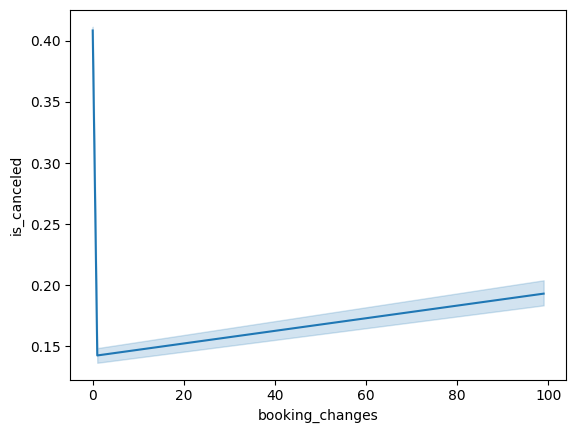

In [206]:
# Lineplot of 'is_canceled' and 'booking_changes'
sns.lineplot(x='booking_changes',y='is_canceled',data=df2)

In [207]:
# Integrating the values of 'booking_changes' > 0 as 2
df2['booking_changes'][df2['booking_changes']>0]=2

# Integrating the values of 'booking_changes'>1 as 2
df2['booking_changes'].replace({2:1}, inplace=True)

df2.drop(columns= 'paid', inplace = True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-207-1580bdca5ef3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['booking_changes'][df2['booking_changes']>0]=2


In [210]:
# The list of whole and categorical columns
columns3 = [col for col in df2.columns]
       
categorical3=['hotel', 'is_canceled', 
       'arrival_date_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest','reserved_room_type',
       'new_agent','customer_type']

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [212]:
# Build a one table to check the p-value of the variables 
table5 = TableOne(df2, groupby='is_canceled', columns=columns3, categorical = categorical3,  pval=True)
print(table5.tabulate(tablefmt='rst'))

=========================================  =============  =========  =============  =============  =============  =========
..                                                        Missing    Overall        0              1              P-Value
=========================================  =============  =========  =============  =============  =============  =========
n                                                                    119193         75011          44182
hotel, n (%)                               City Hotel     0          79163 (66.4)   46084 (61.4)   33079 (74.9)   <0.001
..                                         Resort Hotel              40030 (33.6)   28927 (38.6)   11103 (25.1)
is_canceled, n (%)                         0              0          75011 (62.9)   75011 (100.0)                 <0.001
..                                         1                         44182 (37.1)                  44182 (100.0)
lead_time, mean (SD)                                      

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[<Axes: title={'center': 'lead_time'}>,
        <Axes: title={'center': 'arrival_date_year'}>,
        <Axes: title={'center': 'arrival_date_week_number'}>,
        <Axes: title={'center': 'arrival_date_day_of_month'}>],
       [<Axes: title={'center': 'stays_in_week_nights'}>,
        <Axes: title={'center': 'adults'}>,
        <Axes: title={'center': 'babies'}>,
        <Axes: title={'center': 'previous_cancellations'}>],
       [<Axes: title={'center': 'previous_bookings_not_canceled'}>,
        <Axes: title={'center': 'booking_changes'}>,
        <Axes: title={'center': 'days_in_waiting_list'}>,
        <Axes: title={'center': 'adr'}>],
       [<Axes: title={'center': 'total_of_special_requests'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

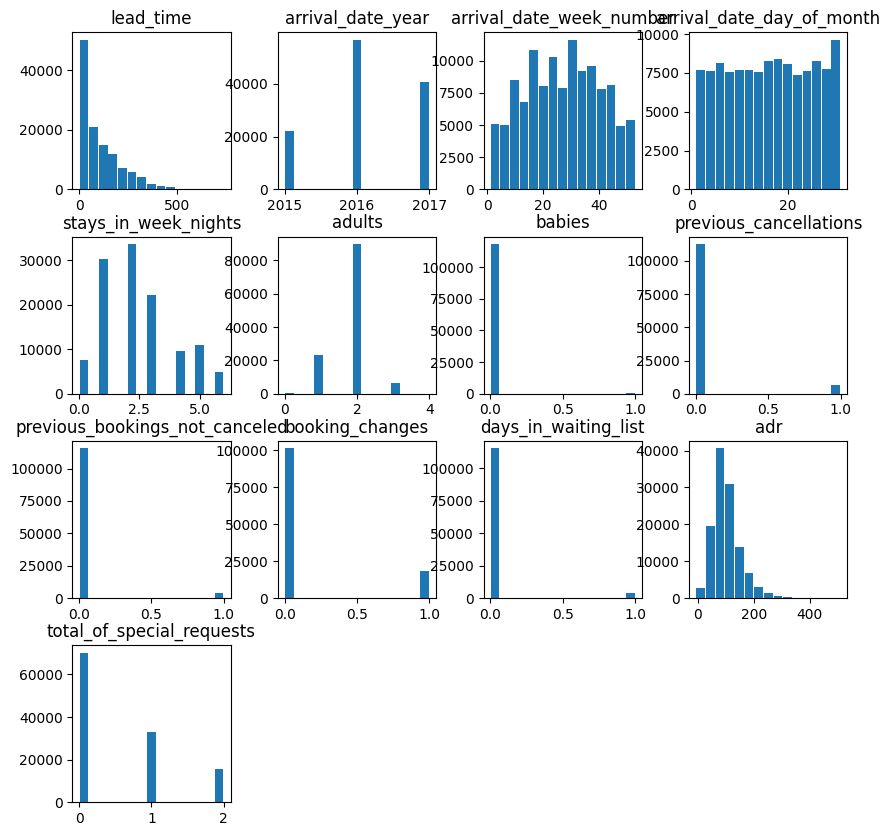

In [214]:
# Plot continuous variables
continuous_variables = [col for col in columns3 if col not in categorical3]
df2[continuous_variables].hist(figsize=(10,10), grid=False, rwidth=0.9, bins=15)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='adr', ylabel='Count'>

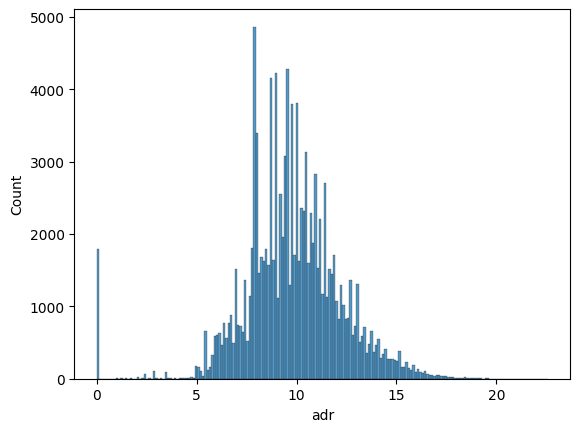

In [217]:
# Normalize variables
df2['lead_time']=np.sqrt(df2['lead_time'])
df2['adr']=np.sqrt(df2['adr'])

# Plot histogram
sns.histplot((df2['adr']))

In [220]:
# Convert month from categorical variable to continuous variable
df2['arrival_date_month'] = df2.arrival_date_month.replace({'January':1, 'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12})

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [222]:
# Seperate categorical variables and numerical variables
cat= df2.nunique()[df2.nunique()<6].keys().tolist()
numeric = [col for col in df2.columns if col not in cat]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [223]:
# Split target variable and remove from categorical variables list
target = df2.is_canceled
df2.drop(columns='is_canceled', inplace=True)
cat.remove('is_canceled')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [224]:
# One hot encode categorical variables
cat_encode = pd.get_dummies(data=df2[cat], drop_first=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-224-534da0e16fbd>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat_encode = pd.get_dummies(data=df2, columns=cat, drop_first=True)
<ipython-input-224-534da0e16fbd>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat_encode = pd.get_dummies(data=df2, columns=cat, drop_first=True)


In [225]:
# Standardize the continuous variables
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(df2[continuous_variables])
scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=continuous_variables)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [230]:
# Merge encoded categorical variables and standardized continuous variables and drop one NAN observation
df3= cat_encode.merge(right=scaled_numeric_df,  left_index=True, right_index=True)
df3 = df3.merge(target,left_index=True,right_index=True)
df3.dropna(inplace=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 4 Modeling

### 4.1 Importing libraries & prepare feature, target

In [234]:
from sklearn.model_selection import train_test_split,cross_val_score, KFold, GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn import set_config
from sklearn.neural_network import MLPClassifier 
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [235]:
# Split into X and label encoded y
X2 = df3.drop(columns='is_canceled')
label_encoder = LabelEncoder()
y2 = label_encoder.fit_transform(df3['is_canceled'])

# Split X,y into train, and test set
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=17)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 4.2 Logistic Regression

Conducted default logistic regression with Lasso regularization, and lambda =1 <br />
The scores are accuracy:0.84, precision:0.81, recall: 0.75

In [236]:
# Instantiate Logistic Regression
L1_logreg = LogisticRegression(penalty= 'l1', solver= 'liblinear', C=1)
L1_logreg.fit(X_train2, y_train2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [237]:
L1_logreg_y_pred = L1_logreg.predict(X_test2)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(L1_logreg.score(X_test2, y_test2)))

Accuracy of logistic regression classifier on test set: 0.84


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [238]:
print("Precision:",precision_score(y_test2, L1_logreg_y_pred))
print("Recall:",recall_score(y_test2, L1_logreg_y_pred))

Precision: 0.8078264238667183
Recall: 0.752911438115013


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [239]:
logit_acc= L1_logreg.score(X_test2, y_test2)
logit_pre= precision_score(y_test2, L1_logreg_y_pred)
logit_recall = recall_score(y_test2, L1_logreg_y_pred)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [240]:
print(classification_report(y_test2,L1_logreg_y_pred))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.86      0.89      0.88     18672
           1       0.81      0.75      0.78     11077

    accuracy                           0.84     29749
   macro avg       0.83      0.82      0.83     29749
weighted avg       0.84      0.84      0.84     29749



In [241]:
C= [1, .5, .25, .1, .05, .025, .01, .005, .0025]
L1_metrics = np.zeros((len(C),5))
L1_metrics[:,0]=C
for index in range(0, len(C)):
    logit = LogisticRegression(penalty='l1',C=C[index], solver='liblinear')
    logit.fit(X_train2,y_train2)
    pred_test_Y = logit.predict(X_test2)
    L1_metrics[index,1] = np.count_nonzero(logit.coef_)
    L1_metrics[index,2] = accuracy_score(y_test2, pred_test_Y)
    L1_metrics[index,3] = precision_score(y_test2, pred_test_Y)
    L1_metrics[index,4] = recall_score(y_test2, pred_test_Y)
col_names = ['C','Non-zero Coeffs', 'Accuracy','Precision','Recall']
print(pd.DataFrame(L1_metrics, columns=col_names))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


        C  Non-zero Coeffs  Accuracy  Precision    Recall
0  1.0000             48.0  0.841238   0.807789  0.752731
1  0.5000             47.0  0.841440   0.808140  0.752911
2  0.2500             45.0  0.841373   0.808102  0.752731
3  0.1000             45.0  0.841138   0.808032  0.752009
4  0.0500             43.0  0.840701   0.807252  0.751648
5  0.0250             37.0  0.839860   0.806367  0.750023
6  0.0100             33.0  0.838516   0.806568  0.744967
7  0.0050             32.0  0.836566   0.807521  0.736662
8  0.0025             30.0  0.829944   0.805917  0.715627


In [242]:
coefficients = pd.concat([pd.DataFrame(X_train2.columns),
pd.DataFrame(np.transpose(L1_logreg.coef_))], axis = 1)
coefficients.columns = ['Feature', 'Coefficient']
coefficients['Exp_Coefficient'] = np.exp(coefficients['Coefficient'])
coefficients = coefficients[coefficients['Coefficient']!=0]
print(coefficients.sort_values(by=['Coefficient']))

                             Feature  Coefficient  Exp_Coefficient
30     required_car_parking_spaces_1    -8.459139         0.000212
24  previous_bookings_not_canceled_1    -3.392810         0.033614
16                    country_others    -2.398410         0.090862
32       total_of_special_requests_2    -1.737211         0.176011
22               is_repeated_guest_1    -1.716368         0.179718
29               customer_type_other    -1.562854         0.209537
31       total_of_special_requests_1    -1.356973         0.257439
27                 booking_changes_1    -0.968280         0.379736
47       required_car_parking_spaces    -0.479194         0.619282
42            previous_cancellations    -0.473450         0.622850
48         total_of_special_requests    -0.452058         0.636317
6                 hotel_Resort Hotel    -0.368563         0.691728
44                   booking_changes    -0.271409         0.762304
37        arrival_date_week_number_y    -0.255136         0.77

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [243]:
logit_model=sm.Logit(y_train2,X_train2)
result=logit_model.fit()
print(result.summary())

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


         Current function value: 0.343464
         Iterations: 35


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                89245
Model:                          Logit   Df Residuals:                    89196
Method:                           MLE   Df Model:                           48
Date:                Mon, 24 Apr 2023   Pseudo R-squ.:                  0.4792
Time:                        09:01:35   Log-Likelihood:                -30652.
converged:                      False   LL-Null:                       -58853.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
lead_time_x                          0.1128      0.003     43.143      0.000       0.108       0.118
arrival_date_month                   0.2047      0.138      1.486

In [244]:
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_test2, y_test2)
clf.predict(X_test2)
clf.score(X_test2, y_test2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
S

0.8412383609533094

In [245]:
scores = cross_val_score(clf, X_train2, y_train2, cv=10)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
S

In [246]:
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.84661064 0.84201681 0.84694678 0.84672269 0.83966387 0.84692963
 0.84592111 0.84636934 0.84592111 0.84547288]


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [247]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0.8396638655462185, 0.8452574858719821, 0.8469467787114846)

### 4.3 Ensemble Learning 

In [248]:
SEED = 1
lr=LogisticRegression(random_state=SEED)
knn=KNN()
dt= DecisionTreeClassifier(random_state=SEED)

classifiers=[('Logistic Regression', lr),
             ('K Nearest Neighbors', knn),
             ('Decision Tree',dt)]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [249]:
for clf_name, clf in classifiers:
    clf.fit(X_train2, y_train2)
    y_pred = clf.predict(X_test2)
    print('{:s}:{:.3f}'.format(clf_name,accuracy_score(y_test2,y_pred)))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:0.838
K Nearest Neighbors:0.822
Decision Tree:0.858


In [250]:
vc = VotingClassifier(estimators= classifiers)
vc.fit(X_train2,y_train2)
vc_y_pred = vc.predict(X_test2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [251]:
print('Voting Classifier: {:.3f}'.format(accuracy_score(y_test2,vc_y_pred)))
print("Precision:",precision_score(y_test2, vc_y_pred))
print("Recall:",recall_score(y_test2,vc_y_pred))

Voting Classifier: 0.881
Precision: 0.8639350599149594
Recall: 0.8070777286268845


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [252]:
vc_acc= accuracy_score(y_test2, vc_y_pred)
vc_pre= precision_score(y_test2, vc_y_pred)
vc_recall = recall_score(y_test2, vc_y_pred)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [253]:
print(classification_report(y_test2,vc_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91     18672
           1       0.86      0.81      0.83     11077

    accuracy                           0.88     29749
   macro avg       0.88      0.87      0.87     29749
weighted avg       0.88      0.88      0.88     29749



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[17264  1408]
 [ 2137  8940]]


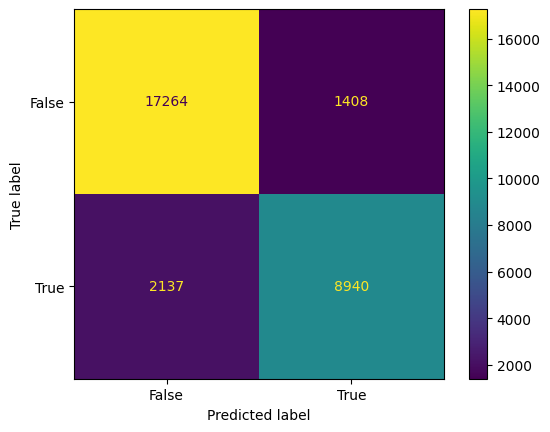

In [254]:
vc_conf_matrix = confusion_matrix(y_test2,vc_y_pred)
print(vc_conf_matrix)
vc_display = ConfusionMatrixDisplay(confusion_matrix=vc_conf_matrix, display_labels = [False, True])
vc_display.plot()
plt.show()

### 4.4 Bagging Classifier

In [255]:
bag_tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)
bc = BaggingClassifier(base_estimator = bag_tree, n_estimators=300, n_jobs=-1, oob_score=True)
bc.fit(X_train2,y_train2)
bc_y_pred =bc.predict(X_test2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [256]:
oob_accuracy = bc.oob_score_
print('OOB accuracy: {:.3f}'.format(oob_accuracy))
print("Accuracy:",accuracy_score(y_test2, bc_y_pred))
print("Precision:",precision_score(y_test2, bc_y_pred))
print("Recall:",recall_score(y_test2, bc_y_pred))

OOB accuracy: 0.684
Accuracy: 0.6841910652458906
Precision: 0.569504132231405
Recall: 0.6220998465288435


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [257]:
bc_acc= accuracy_score(y_test2, bc_y_pred)
bc_pre= precision_score(y_test2, bc_y_pred)
bc_recall = recall_score(y_test2, bc_y_pred)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 4.5 Random Forest

In [258]:
rf = RandomForestClassifier(n_estimators=400, min_samples_leaf = 0.12, random_state=1)
rf.fit(X_train2, y_train2)
rf_y_pred = rf.predict(X_test2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [259]:
confusion_matrix(y_test2, rf_y_pred)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[18557,   115],
       [ 9043,  2034]])

In [260]:
rf_accuracy= accuracy_score(y_test2, rf_y_pred)
print(rf_accuracy)

0.6921577195872131


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [261]:
print("Accuracy:",accuracy_score(y_test2, rf_y_pred))
print('Recall Score: {:.2f}'.format(recall_score(y_test2, rf_y_pred)))
print('Precision Score:{:.2f}'.format(precision_score(y_test2, rf_y_pred)))

Accuracy: 0.6921577195872131
Recall Score: 0.18
Precision Score:0.95


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [262]:
rf_acc = accuracy_score(y_test2, rf_y_pred)
rf_recall = recall_score(y_test2, rf_y_pred)
rf_pre = precision_score(y_test2, rf_y_pred)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [263]:
print(classification_report(y_test2,rf_y_pred))

              precision    recall  f1-score   support

           0       0.67      0.99      0.80     18672
           1       0.95      0.18      0.31     11077

    accuracy                           0.69     29749
   macro avg       0.81      0.59      0.55     29749
weighted avg       0.77      0.69      0.62     29749



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


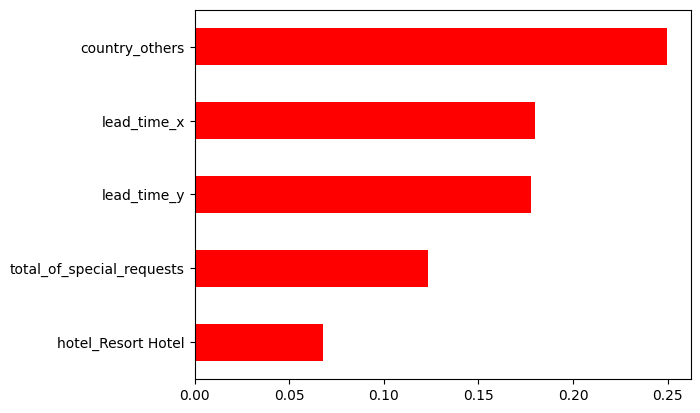

In [283]:
importance_rf = pd.Series(rf.feature_importances_, index=X2.columns)
sorted_importance_rf = importance_rf[importance_rf>0.05].sort_values()
sorted_importance_rf.plot(kind='barh',color='red')
plt.show()

In [265]:
# Create the parameter grid
param_grid = {'max_depth': list(range(3,10)), 'max_features': ['auto' , 'sqrt'], 'criterion':['gini','entropy','log_loss']} 

# Create a random search object
random_rf_class = RandomizedSearchCV(
    estimator = RandomForestClassifier(n_estimators=100),
    param_distributions = param_grid, n_iter = 100,
    scoring='accuracy', n_jobs=4, cv = 5, refit=True, return_train_score = True )

# Fit to the training data
random_rf_class.fit(X_train2, y_train2)

# Print the values used for both hyperparameters
print(random_rf_class.cv_results_['param_max_depth'])
print(random_rf_class.cv_results_['param_max_features'])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 42 is smaller than n_iter=100. Running 42 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[3 3 4 4 5 5 6 6 7 7 8 8 9 9 3 3 4 4 5 5 6 6 7 7 8 8 9 9 3 3 4 4 5 5 6 6 7
 7 8 8 9 9]
['auto' 'sqrt' 'auto' 'sqrt' 'auto' 'sqrt' 'auto' 'sqrt' 'auto' 'sqrt'
 'auto' 'sqrt' 'auto' 'sqrt' 'auto' 'sqrt' 'auto' 'sqrt' 'auto' 'sqrt'
 'auto' 'sqrt' 'auto' 'sqrt' 'auto' 'sqrt' 'auto' 'sqrt' 'auto' 'sqrt'
 'auto' 'sqrt' 'auto' 'sqrt' 'auto' 'sqrt' 'auto' 'sqrt' 'auto' 'sqrt'
 'auto' 'sqrt']


In [266]:
random_rf_class.best_score_

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.8546921396156646

In [267]:
rf_best = RandomForestClassifier(n_estimators=100, max_depth = 9, criterion ='gini', random_state=1)
rf_best.fit(X_train2, y_train2)
rf_best_y_pred = rf_best.predict(X_test2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [282]:
print("Accuracy:",accuracy_score(y_test2, rf_best_y_pred))
print('Recall Score: {:.2f}'.format(recall_score(y_test2, rf_best_y_pred)))
print('Precision Score:{:.2f}'.format(precision_score(y_test2, rf_best_y_pred)))

Accuracy: 0.8508185149080641
Recall Score: 0.70
Precision Score:0.88


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 4.6 Decision Tree

In [269]:
mytree3 = DecisionTreeClassifier(max_depth=15,min_samples_leaf=25,max_features='log2')
treemodel3 = mytree3.fit(X_train2, y_train2)
tree_pred_train_y3 = mytree3.predict(X_train2)
tree_pred_test_y3 = mytree3.predict(X_test2)
train_accuracy3 = accuracy_score(y_train2, tree_pred_train_y3)
test_accuracy3 = accuracy_score(y_test2, tree_pred_test_y3)
print('Training accuracy:', round(train_accuracy3,4))
print('Test accuracy:', round(test_accuracy3,4))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Training accuracy: 0.8413
Test accuracy: 0.8208


In [270]:
scores = cross_val_score(treemodel3, X_train2, y_train2, cv=10)
print('Cross-Validation Accuracy Scores', scores)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cross-Validation Accuracy Scores [0.82442577 0.81938375 0.83036415 0.83114846 0.82711485 0.82014792
 0.8070372  0.8191394  0.83168983 0.8123039 ]


In [271]:
tree_parameters = {'splitter' : ['best', 'random'],
'criterion' : ['gini', 'entropy'],
'max_features': ['log2', 'sqrt','auto'],
'max_depth': list(range(20)),
'min_samples_split': list(range(20)),
'min_samples_leaf': list(range(20))}

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [272]:
depth_list = list(range(2,15))
depth_tuning = np.zeros((len(depth_list), 4))
depth_tuning[:,0] = depth_list
for index in range(len(depth_list)):
    mytree = DecisionTreeClassifier(max_depth=depth_list[index])
    mytree.fit(X_train2, y_train2)
    pred_test_Y = mytree.predict(X_test2)
    depth_tuning[index,1] = accuracy_score(y_test2, pred_test_Y)
    depth_tuning[index,2] = precision_score(y_test2, pred_test_Y)
    depth_tuning[index,3] = recall_score(y_test2, pred_test_Y)
    col_names = ['Max_Depth','Accuracy','Precision','Recall']
print(pd.DataFrame(depth_tuning, columns=col_names))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


    Max_Depth  Accuracy  Precision    Recall
0         2.0  0.758042   0.733309  0.550330
1         3.0  0.780732   0.699422  0.720953
2         4.0  0.804666   0.748069  0.716801
3         5.0  0.811893   0.762575  0.718516
4         6.0  0.823456   0.741401  0.807529
5         7.0  0.832196   0.752636  0.818272
6         8.0  0.841003   0.766883  0.823237
7         9.0  0.845978   0.789052  0.800307
8        10.0  0.855625   0.794460  0.825946
9        11.0  0.860130   0.804831  0.824230
10       12.0  0.859962   0.803141  0.826487
11       13.0  0.864332   0.812239  0.826758
12       14.0  0.865374   0.812920  0.829286


In [273]:
dt_class = RandomizedSearchCV(
    estimator = DecisionTreeClassifier(),
    param_distributions = tree_parameters, n_iter = 10,
    scoring='accuracy', n_jobs=4, cv = 5, refit=True, return_train_score = True )

# Fit to the training data
dt_class.fit(X_train2, y_train2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.f

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=4,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9, 10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'max_features': ['log2', 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': [0, 1, 2, 3, 4, 5,
                                                             6, 7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19],
                                        'min_samples_split': [0, 1, 2, 3, 4, 5,
                                                              6, 7, 8, 9, 10,
                                                              11, 12, 13, 14,
                                                              15, 16, 17, 18,
                                                              19],
                                        'splitter': ['best', 'random']},
                   return_train_score=True, scoring='accuracy')

In [274]:
print(dt_class.best_score_)
print(dt_class.best_params_)

0.8496386352176593
{'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 19, 'criterion': 'entropy'}


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [275]:
tree_y_pred = dt_class.predict(X_test2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [276]:
tree_acc = accuracy_score(y_test2, tree_y_pred)
tree_recall = recall_score(y_test2, tree_y_pred)
tree_pre = precision_score(y_test2, tree_y_pred)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [277]:
print("Precision:",precision_score(y_test2, tree_y_pred))
print("Recall:",recall_score(y_test2,tree_y_pred))
print("Accuracy:",accuracy_score(y_test2, tree_y_pred))
print(classification_report(y_test2,tree_y_pred))

Precision: 0.8001096290882515
Recall: 0.7906472871716168
Accuracy: 0.848499109213755
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     18672
           1       0.80      0.79      0.80     11077

    accuracy                           0.85     29749
   macro avg       0.84      0.84      0.84     29749
weighted avg       0.85      0.85      0.85     29749



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[16484  2188]
 [ 2319  8758]]


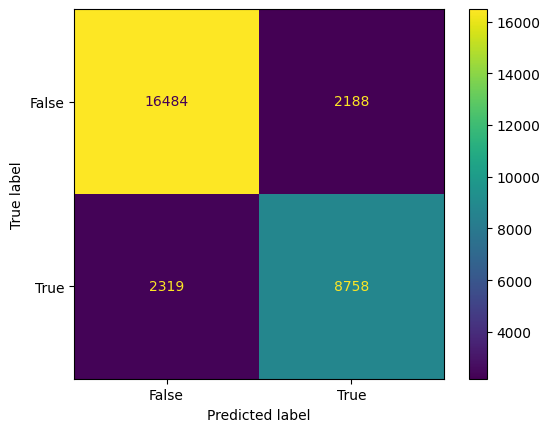

In [278]:
tree_conf_matrix = confusion_matrix(y_test2,tree_y_pred)
print(tree_conf_matrix)
tree_display = ConfusionMatrixDisplay(confusion_matrix=tree_conf_matrix, display_labels = [False, True])
tree_display.plot()
plt.show()

### 4.7 Neural Network

In [306]:
early_stopping_monitor = EarlyStopping(patience=5, monitor='val_loss',verbose = 1)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [314]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim = X2.shape[1] ))
model.add(Dense(1, activation='sigmoid'))

# Compile the model and calculate its accuracy:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy']) 

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [315]:
# Print a summary of the Keras model:
model.fit(X2, y2, validation_split=0.3, epochs=50, callbacks = [early_stopping_monitor])

Epoch 1/50


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2603/2603 [==============================] - 6s 2ms/step - loss: 0.3055 - accuracy: 0.8680 - val_loss: 1.4416 - val_accuracy: 0.3679
Epoch 2/50
2603/2603 [==============================] - 5s 2ms/step - loss: 0.2347 - accuracy: 0.9026 - val_loss: 1.9549 - val_accuracy: 0.2816
Epoch 3/50
2603/2603 [==============================] - 6s 2ms/step - loss: 0.2194 - accuracy: 0.9091 - val_loss: 1.9575 - val_accuracy: 0.3126
Epoch 4/50
2603/2603 [==============================] - 5s 2ms/step - loss: 0.2078 - accuracy: 0.9130 - val_loss: 1.7881 - val_accuracy: 0.3652
Epoch 5/50
2603/2603 [==============================] - 5s 2ms/step - loss: 0.1988 - accuracy: 0.9154 - val_loss: 2.2198 - val_accuracy: 0.2728
Epoch 6/50
2603/2603 [==============================] - 6s 2ms/step - loss: 0.1916 - accuracy: 0.9181 - val_loss: 2.8127 - val_accuracy: 0.2484
Epoch 6: early stopping


In [316]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 32)                1600      
                                                                 
 dense_47 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,633
Trainable params: 1,633
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 4.8 XGBoost Classifier

In [317]:
# Create the parameter gridx
xgb_learn_rate_list = np.linspace(0.001,2,150)
xgb_min_samples_leaf_list = list(range(1,51))
xgb_param_grid = {'learning_rate': xgb_learn_rate_list, 'min_samples_leaf': xgb_min_samples_leaf_list} 

# Create a random search object
random_GBM_class = RandomizedSearchCV(
    estimator = GradientBoostingClassifier(),
    param_distributions = xgb_param_grid, n_iter = 10,
    scoring='accuracy', n_jobs=4, cv = 5, refit=True, return_train_score = True )

# Fit to the training data
random_GBM_class.fit(X_train2, y_train2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=4,
                   param_distributions={'learning_rate': array([1.00000000e-03, 1.44161074e-02, 2.78322148e-02, 4.12483221e-02,
       5.46644295e-02, 6.80805369e-02, 8.14966443e-02, 9.49127517e-02,
       1.08328859e-01, 1.21744966e-01, 1.35161074e-01, 1.48577181e-01,
       1.61993289e-01, 1.75409396e-01, 1.88825503e-01, 2.0224161...
       1.82559060e+00, 1.83900671e+00, 1.85242282e+00, 1.86583893e+00,
       1.87925503e+00, 1.89267114e+00, 1.90608725e+00, 1.91950336e+00,
       1.93291946e+00, 1.94633557e+00, 1.95975168e+00, 1.97316779e+00,
       1.98658389e+00, 2.00000000e+00]),
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27, 28, 29, 30, ...]},
                   return_train_score=True, scoring='accuracy')

In [318]:
random_GBM_class.best_score_

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.9054624908958486

In [319]:
print(random_GBM_class.cv_results_)

{'mean_fit_time': array([34.92339215, 32.24989028, 32.83690715, 33.05235438, 32.44152718,
       32.55497704, 33.62446036, 33.28778124, 32.6485672 , 30.53888974]), 'std_fit_time': array([1.43022881, 1.1185972 , 0.6830225 , 0.80801264, 0.68018591,
       1.04896187, 1.24658169, 0.57007486, 1.29600285, 3.29794633]), 'mean_score_time': array([0.06926126, 0.07786322, 0.07151036, 0.05679274, 0.05858269,
       0.06115193, 0.06441064, 0.06705365, 0.05853267, 0.05137181]), 'std_score_time': array([0.02305072, 0.02770177, 0.01752825, 0.00162298, 0.00234767,
       0.01197302, 0.00325546, 0.01602502, 0.00187934, 0.0077764 ]), 'param_min_samples_leaf': masked_array(data=[1, 20, 27, 17, 46, 29, 33, 14, 28, 33],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=[1.1011208053691275, 0.5376442953020135,
                   0.1754093959731544, 0.94012751

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [320]:
GBM_y_pred= random_GBM_class.predict(X_test2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [321]:
accuracy_score(y_test2, GBM_y_pred)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.9038959292749336

In [322]:
print("Precision:",precision_score(y_test2, GBM_y_pred))
print("Recall:",recall_score(y_test2,GBM_y_pred))

Precision: 0.8744304720247859
Recall: 0.8662995395865306


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [323]:
GBM_acc = accuracy_score(y_test2, GBM_y_pred)
GBM_recall = recall_score(y_test2, GBM_y_pred)
GBM_pre = precision_score(y_test2, GBM_y_pred)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[17294  1378]
 [ 1481  9596]]


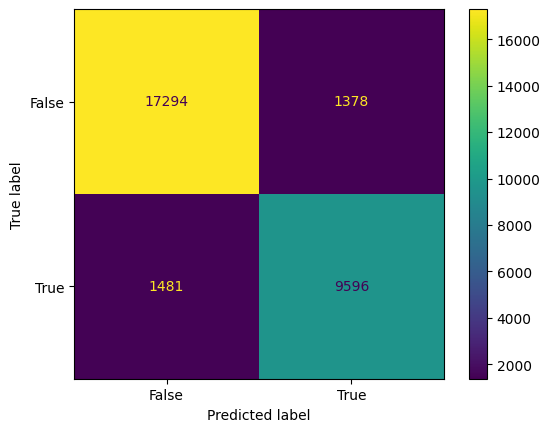

In [324]:
GBM_conf_matrix = confusion_matrix(y_test2,GBM_y_pred)
print(GBM_conf_matrix)
GBM_display = ConfusionMatrixDisplay(confusion_matrix=GBM_conf_matrix, display_labels = [False, True])
GBM_display.plot()
plt.show()

In [325]:
print(classification_report(y_test2,GBM_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     18672
           1       0.87      0.87      0.87     11077

    accuracy                           0.90     29749
   macro avg       0.90      0.90      0.90     29749
weighted avg       0.90      0.90      0.90     29749



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [326]:
# Create the parameter gridx
xgb_param_grid2 = {'learning_rate': np.arange(0.001,1.05,0.05), 
                   'n_estimators':[50,100,200,300,400],
                   'subsample':np.arange(0.05,1.05,0.05),
                   'min_samples_leaf': np.arange(1,100) } 

# Create a random search object
random_GBM_class2 = RandomizedSearchCV(
    estimator = GradientBoostingClassifier(),
    param_distributions = xgb_param_grid2, n_iter = 100,
    scoring='accuracy', n_jobs=4, cv = 5, refit=True, return_train_score = True )

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [328]:
# Fit to the training data
random_GBM_class2.fit(X_train2, y_train2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=4,
                   param_distributions={'learning_rate': array([1.000e-03, 5.100e-02, 1.010e-01, 1.510e-01, 2.010e-01, 2.510e-01,
       3.010e-01, 3.510e-01, 4.010e-01, 4.510e-01, 5.010e-01, 5.510e-01,
       6.010e-01, 6.510e-01, 7.010e-01, 7.510e-01, 8.010e-01, 8.510e-01,
       9.010e-01, 9.510e-01, 1.001e+00]),
                                        'min_sample...
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'n_estimators': [50, 100, 200, 300,
                                                         400],
                                        'subsample': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])},
                   return_train_score=True, scoring='accuracy')

In [329]:
random_GBM_class2.best_params_

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'subsample': 1.0,
 'n_estimators': 300,
 'min_samples_leaf': 44,
 'learning_rate': 1.001}

In [330]:
random_GBM_class2.best_score_

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.919793825984649

In [331]:
GBM_y_pred2 = random_GBM_class2.predict(X_test2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [332]:
print('GBM Classifier: {:.3f}'.format(accuracy_score(y_test2, GBM_y_pred2)))
print("Precision:",precision_score(y_test2, GBM_y_pred2))
print("Recall:",recall_score(y_test2,GBM_y_pred2))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GBM Classifier: 0.916
Precision: 0.8897165697674418
Recall: 0.8841744154554483


In [333]:
print(random_GBM_class2.cv_results_)

{'mean_fit_time': array([ 16.18107519,  17.35218387,  82.85712523,  13.1117559 ,
        81.12895389,  58.74425426,  91.13307195,   9.29801216,
        66.21028767,  43.81368065,   8.04341407, 110.53777671,
        83.18489866,  44.29585557,  12.59206882,  12.13531823,
        13.11351581,  14.43434286,  85.84478598,   7.96928339,
        52.38101158,   9.36645451,  31.34627223,  80.86193657,
        13.6177824 ,   3.65045242,  33.12177272,  27.58243089,
         6.09583726,   8.4863266 ,  10.91435432,  33.04721103,
        18.20215311,  97.59556808,  79.75173998,  31.50936193,
         3.66267905,   9.91070628,  66.15703077,  59.17248425,
        22.19253292,  45.56104641,  50.04341998, 100.20116529,
         4.09593096,  80.96098552,   8.32372961,  35.90341706,
       124.27482142,  68.69375997,   8.17872286,  18.84069872,
         5.90582085,  51.922648  ,  17.9975244 ,  42.97222519,
        20.47063742,  34.25921326,  36.18828216,  30.69264216,
        23.62819953,   6.81384645,   

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [339]:
GBM_acc= accuracy_score(y_test2, GBM_y_pred2)
GBM_pre= precision_score(y_test2, GBM_y_pred2)
GBM_recall = recall_score(y_test2, GBM_y_pred2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 5 Results
Comparing 7 classification algorithms, XGBoost model performed the best with an accuracy of 0.916, precision of 0.889 and recall of 0.884.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


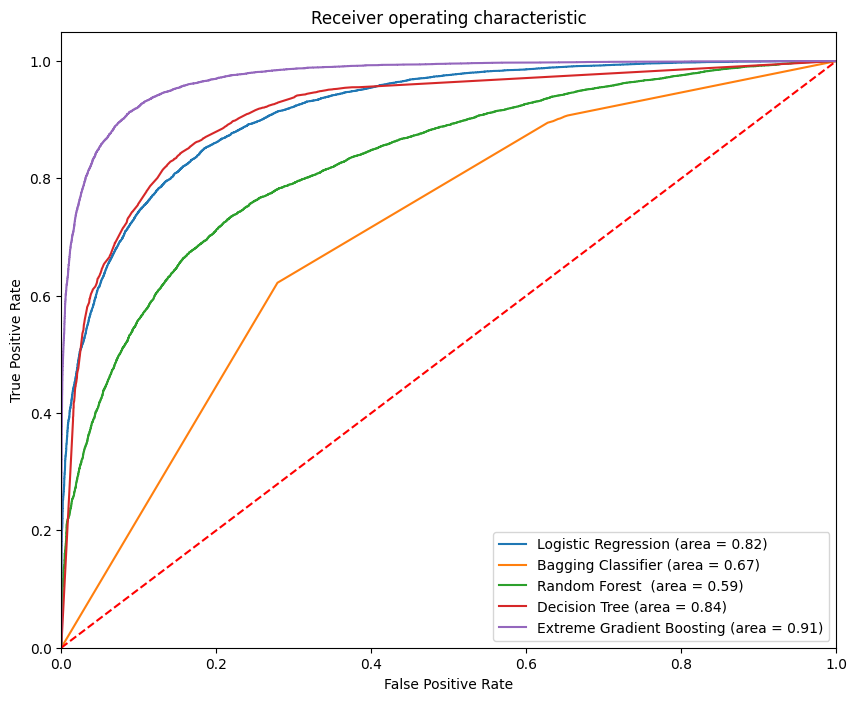

In [340]:
L1_logreg2_roc_auc = roc_auc_score(y_test2, L1_logreg.predict(X_test2))
l1_fpr, l1_tpr, l1_thresholds = roc_curve(y_test2, L1_logreg.predict_proba(X_test2)[:,1])

bc_roc_auc = roc_auc_score(y_test2, bc.predict(X_test2))
bc_fpr, bc_tpr, bc_thresholds = roc_curve(y_test2, bc.predict_proba(X_test2)[:,1])

rf_roc_auc = roc_auc_score(y_test2, rf.predict(X_test2))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test2, rf.predict_proba(X_test2)[:,1])

dt_roc_auc = roc_auc_score(y_test2, dt_class.predict(X_test2))
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test2, dt_class.predict_proba(X_test2)[:,1])

XGB_roc_auc = roc_auc_score(y_test2, best_GBM.predict(X_test2))
XGB_fpr, XGB_tpr, XGB_thresholds = roc_curve(y_test2, random_GBM_class2.predict_proba(X_test2)[:,1])

plt.figure(figsize=(10,8))

plt.plot(l1_fpr, l1_tpr, label='Logistic Regression (area = %0.2f)' % L1_logreg2_roc_auc)
plt.plot(bc_fpr, bc_tpr, label = 'Bagging Classifier (area = %0.2f)' % bc_roc_auc)
plt.plot(rf_fpr, rf_tpr, label = 'Random Forest  (area = %0.2f)' % rf_roc_auc)
plt.plot(dt_fpr, dt_tpr, label = 'Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot(XGB_fpr, XGB_tpr, label = 'Extreme Gradient Boosting (area = %0.2f)' % XGB_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [341]:
report = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Ensemble Learning', 'Bagging Classifier', 'Random Forest', 'Decision Tree Classifier', 
              'XGBoost'],
    'Accuracy' : [logit_acc, vc_acc, bc_acc, rf_acc, tree_acc, GBM_acc],
    'Recall' : [logit_recall, vc_recall, bc_recall, rf_recall, tree_recall, GBM_recall],
    'Precision' : [logit_pre, vc_pre, bc_pre, rf_pre, tree_pre, GBM_pre]  })

report.sort_values(by = 'Accuracy', ascending = False).reset_index().drop(columns=['index'])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Model,Accuracy,Recall,Precision
0,XGBoost,0.916064,0.884174,0.889717
1,Ensemble Learning,0.880836,0.807078,0.863935
2,Decision Tree Classifier,0.848499,0.790647,0.800110
3,Logistic Regression,0.841306,0.752911,0.807826
4,Random Forest,0.692158,0.183624,0.946487
5,Bagging Classifier,0.684191,0.622100,0.569504
